In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


Data importing and exploration
---

In [3]:
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [5]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.shape

(768, 9)

In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Missing data

In [12]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

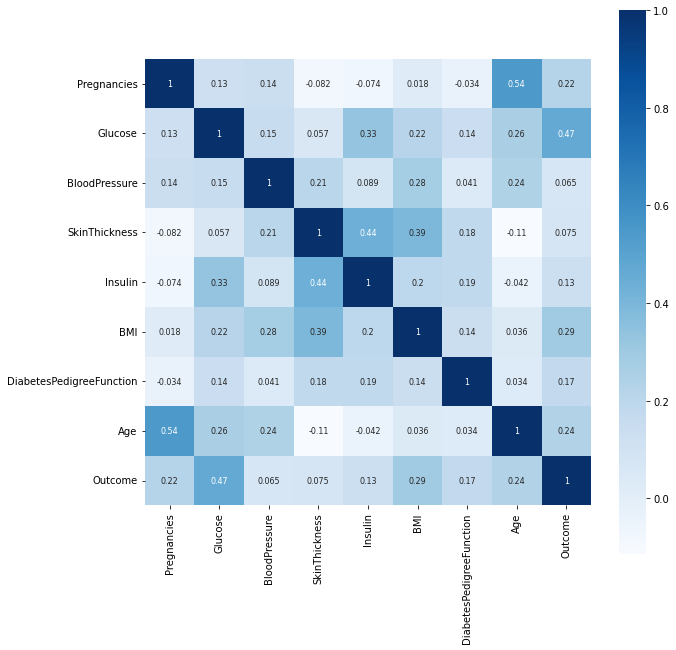

In [14]:
correlations = diabetes_data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlations, cbar = True, square=True, annot=True, annot_kws={'size':8}, cmap='Blues')

Data Preprocessing

In [15]:
X, Y = diabetes_data.drop('Outcome', axis = 1), diabetes_data['Outcome']

Data standardization

In [19]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) 

In [20]:
from pandas.core.common import random_state
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, stratify = Y, random_state=1)

In [21]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(768, 8) (691, 8) (77, 8) (691,) (77,)


Data modelling

In [22]:
models = {'Logistic Regression':LogisticRegression(), 
          'Random Forest': RandomForestClassifier(),
          'Nearest Neighbors': KNeighborsClassifier(),
          'Linear SVM': SVC(kernel = "linear"),
          "RBF SVM": SVC(gamma=2, C=1),
          "Gaussian Process":GaussianProcessClassifier(1.0*RBF(1.0)),
          "Decision Tree": DecisionTreeClassifier(),
          "Neural Net": MLPClassifier(alpha = 1, max_iter = 1000),
          "AdaBoost": AdaBoostClassifier(),
          "Naive Bayes": GaussianNB(),
          "QDA": QuadraticDiscriminantAnalysis()
          }

In [23]:
def train_and_evaluate(models, X_train, Y_train, X_test, Y_test):
  results = {model_name:{} for model_name in models}
  for model_name, model in models.items():
    model.fit(X_train, Y_train)
    results[model_name]['Train acc'], results[model_name]['Test acc'] = accuracy_score(model.predict(X_train), Y_train), accuracy_score(model.predict(X_test), Y_test)
  return results

In [24]:
models_performance = train_and_evaluate(models, X_train, Y_train, X_test, Y_test)
for res in models_performance:
  print(res, models_performance[res])

Logistic Regression {'Train acc': 0.7959479015918958, 'Test acc': 0.6883116883116883}
Random Forest {'Train acc': 1.0, 'Test acc': 0.6883116883116883}
Nearest Neighbors {'Train acc': 0.8350217076700435, 'Test acc': 0.6883116883116883}
Linear SVM {'Train acc': 0.7973950795947902, 'Test acc': 0.6883116883116883}
RBF SVM {'Train acc': 0.9913169319826338, 'Test acc': 0.6363636363636364}
Gaussian Process {'Train acc': 0.8162083936324168, 'Test acc': 0.6753246753246753}
Decision Tree {'Train acc': 1.0, 'Test acc': 0.6623376623376623}
Neural Net {'Train acc': 0.8205499276410999, 'Test acc': 0.6883116883116883}
AdaBoost {'Train acc': 0.8248914616497829, 'Test acc': 0.6883116883116883}
Naive Bayes {'Train acc': 0.7727930535455861, 'Test acc': 0.6883116883116883}
QDA {'Train acc': 0.7626628075253257, 'Test acc': 0.6883116883116883}
